<a href="https://colab.research.google.com/github/sara010896/PPCA_UnB/blob/main/MC_Contratos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analise de distribuicoes de probabilidade - contratos

1. distribuicao uniforme discreta
    valor  id
0  100000   1
1  250000   2
2  250000   3
3   50000   4
4  100000   5
5  150000   6
6  250000   7
7  350000   8
8  250000   9
9  250000  10


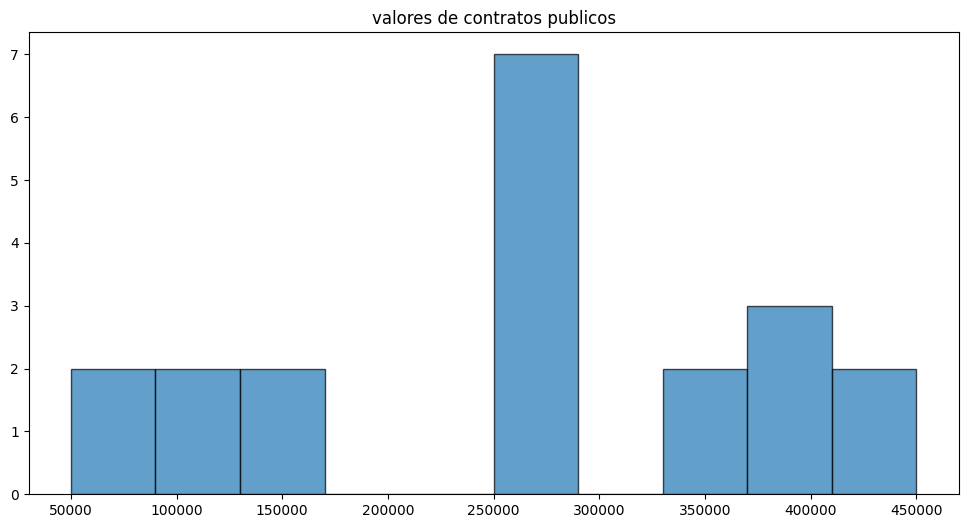


2. distribuicao poisson
chance de 10 licitacoes no mes é: 9.93 %


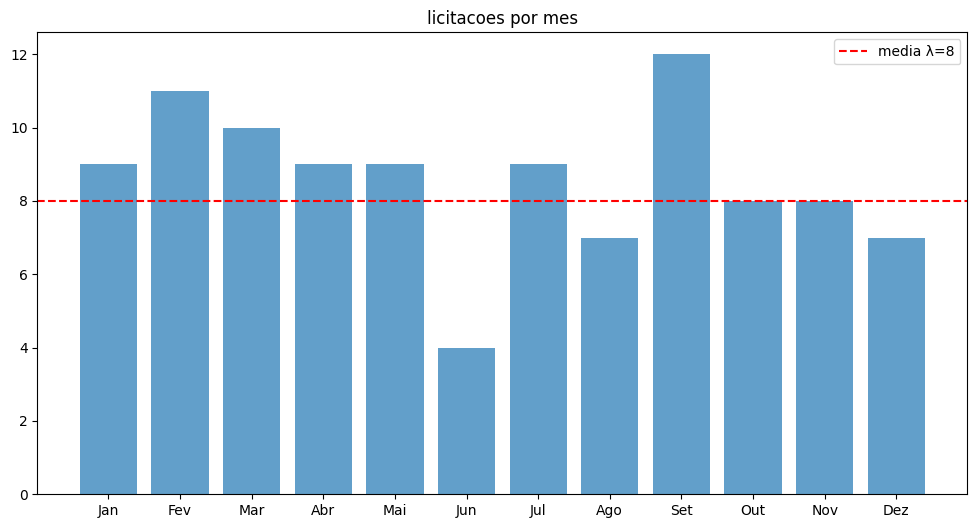


3. distribuicao binomial
prob de pelo menos 90 serem adimplentes: 9.94 %


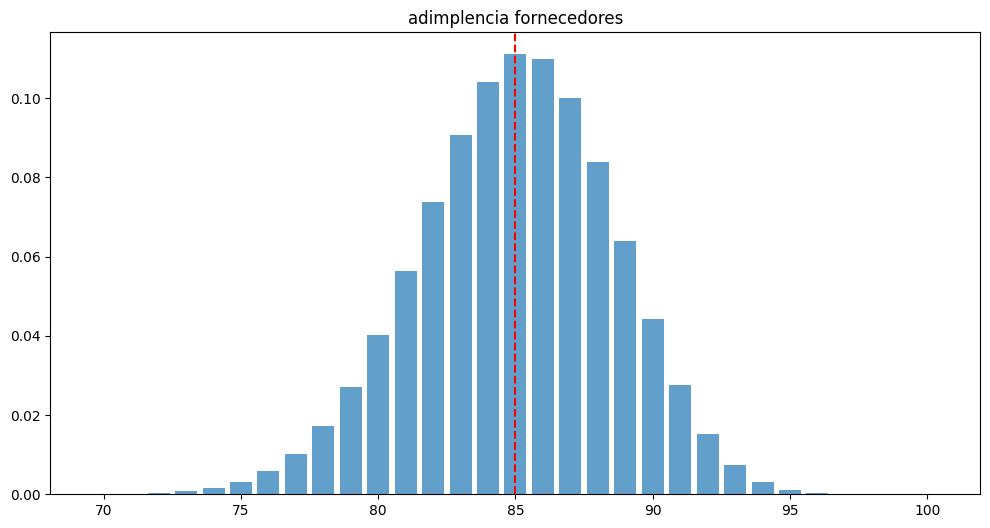


4. distribuicao normal
prob de item custar entre 20k e 30k: 68.27 %


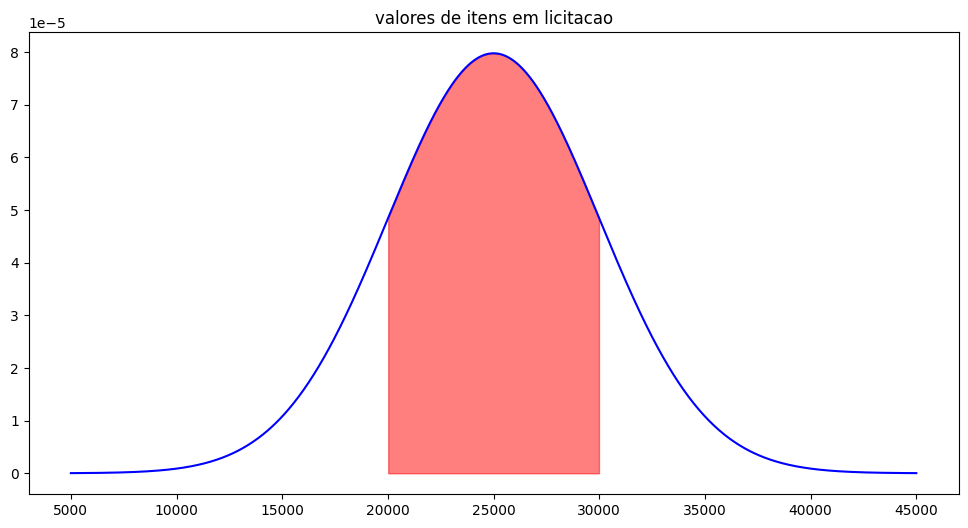


5. Análise integrada. Tudo junto

Estatisticas dos contratos simulados:
               valor        tempo        licit
count    1000.000000  1000.000000  1000.000000
mean   152876.038006    14.885975     5.073000
std     48194.626593     5.268944     2.225449
min     50000.000000     6.005040     0.000000
25%    119640.159015    10.204624     4.000000
50%    153044.880861    14.901129     5.000000
75%    186175.079371    19.599806     6.000000
max    304160.307161    23.973245    14.000000

Correlacao das variaveis
          valor     tempo     licit
valor  1.000000  0.035703 -0.093510
tempo  0.035703  1.000000  0.034529
licit -0.093510  0.034529  1.000000


/tmp/ipython-input-1493025282.py:127: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  licit_cat=df.groupby('categoria')['licit'].mean()


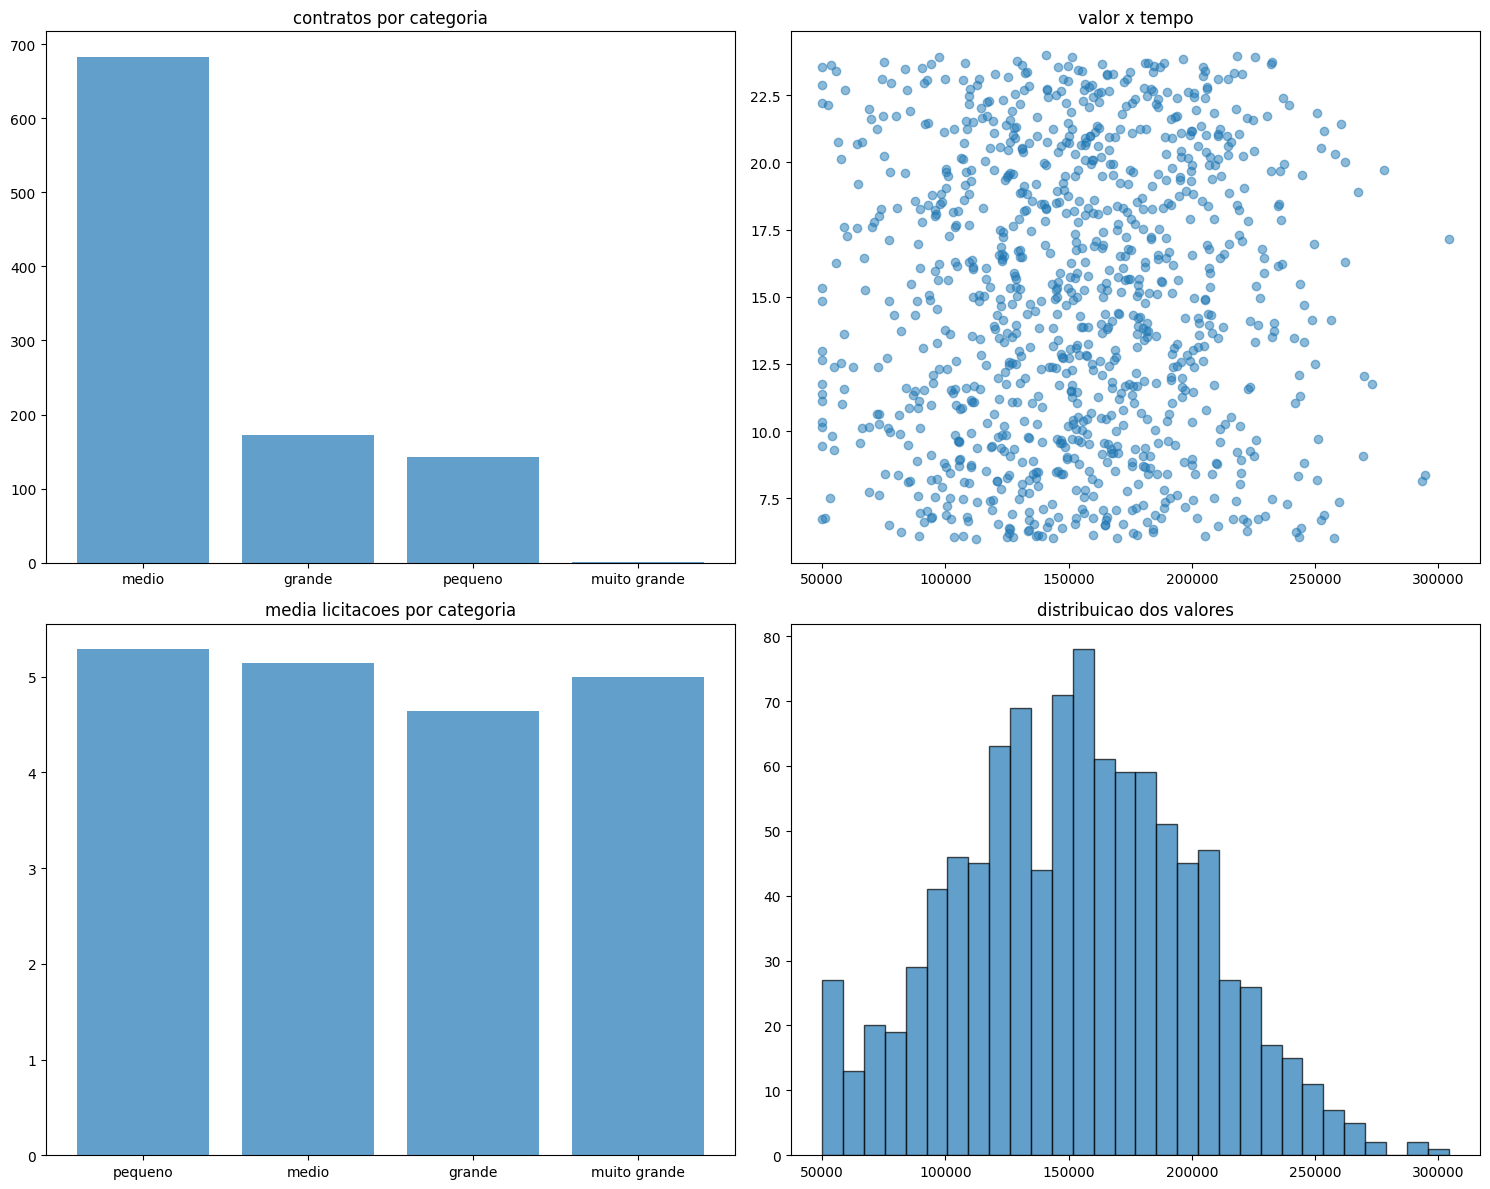


Este modelo simula diversos aspectos de contratos públicos usando diferentes distribuições de probabilidade


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from scipy.stats import uniform
from scipy.stats import poisson
from scipy.stats import binom
from scipy.stats import norm
import math

print("Analise de distribuicoes de probabilidade - contratos")
print("="*60)

#------------------------------
# primeiro... contratos variando entre 50k e 500k
# i
valores_contratos=np.random.choice(np.arange(50000,500000,50000),size=20,replace=True)
contratos=pd.DataFrame(valores_contratos,columns=["valor"])
contratos["id"]=range(1,len(contratos)+1)

print("\n1. distribuicao uniforme discreta")
print("="*40)
print(contratos.head(10))

plt.figure(figsize=(12,6))
plt.hist(contratos['valor'],bins=10,edgecolor='black',alpha=0.7)
plt.title("valores de contratos publicos")
plt.show()

#------------------------------
# Licitações - 8 por mês

lam=8
prob10=poisson.pmf(10,mu=lam)
prob10p=round(prob10,4)*100

print("\n2. distribuicao poisson")
print("="*40)
print("chance de 10 licitacoes no mes é:",prob10p,"%")

# simulação de 1 ano (12 meses)
licitacoes=np.random.poisson(lam=lam,size=12)
meses=['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']
df_licit=pd.DataFrame({'mes':meses,'licit':licitacoes})

plt.figure(figsize=(12,6))
plt.bar(df_licit['mes'],df_licit['licit'],alpha=0.7)
plt.axhline(y=lam,color='red',linestyle='--',label=f"media λ={lam}")
plt.legend()
plt.title("licitacoes por mes")
plt.show()

#------------------------------
# fornecedores. total 100. 85% paga certinho
n=100
p=0.85
prob90=1-binom.cdf(89,n,p)
prob90p=round(prob90,4)*100

print("\n3. distribuicao binomial")
print("="*40)
print("prob de pelo menos 90 serem adimplentes:",prob90p,"%")

nums=np.arange(70,101)
probs=binom.pmf(nums,n,p)

plt.figure(figsize=(12,6))
plt.bar(nums,probs,alpha=0.7)
plt.axvline(x=n*p,color='red',linestyle='--')
plt.title("adimplencia fornecedores")
plt.show()

#------------------------------
# agora itens licitatorios. media 25k, desvio 5k
mu=25000
sigma=5000
prob20_30=norm.cdf(30000,mu,sigma)-norm.cdf(20000,mu,sigma)
prob20_30p=round(prob20_30,4)*100

print("\n4. distribuicao normal")
print("="*40)
print("prob de item custar entre 20k e 30k:",prob20_30p,"%")

x=np.linspace(mu-4*sigma,mu+4*sigma,1000)
y=norm.pdf(x,mu,sigma)

plt.figure(figsize=(12,6))
plt.plot(x,y,'b-')
plt.fill_between(x,y,0,where=(x>=20000)&(x<=30000),color='red',alpha=0.5)
plt.title("valores de itens em licitacao")
plt.show()

#------------------------------
print("\n5. Análise integrada. Tudo junto")
print("="*60)

num=1000
val=np.random.normal(150000,50000,num)
val=np.clip(val,50000,500000)
tempo=np.random.uniform(6,24,num)
licit=np.random.poisson(5,num)

df=pd.DataFrame({'valor':val,'tempo':tempo,'licit':licit})
df['categoria']=pd.cut(df['valor'],
 bins=[0,100000,200000,300000,500000],
 labels=['pequeno','medio','grande','muito grande'])

print("\nEstatisticas dos contratos simulados:")
print(df.describe())

print("\nCorrelacao das variaveis")
print(df[['valor','tempo','licit']].corr())

fig,axes=plt.subplots(2,2,figsize=(15,12))

# grafico 1
cats=df['categoria'].value_counts()
axes[0,0].bar(cats.index,cats.values,alpha=0.7)
axes[0,0].set_title("contratos por categoria")

# grafico 2
axes[0,1].scatter(df['valor'],df['tempo'],alpha=0.5)
axes[0,1].set_title("valor x tempo")

# grafico 3
licit_cat=df.groupby('categoria')['licit'].mean()
axes[1,0].bar(licit_cat.index,licit_cat.values,alpha=0.7)
axes[1,0].set_title("media licitacoes por categoria")

# grafico 4
axes[1,1].hist(df['valor'],bins=30,alpha=0.7,edgecolor='black')
axes[1,1].set_title("distribuicao dos valores")

plt.tight_layout()
plt.show()

print("\nEste modelo simula diversos aspectos de contratos públicos usando diferentes distribuições de probabilidade")
